## 导入相关的包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_file = './data/train_new.csv'
test_file = './data/test_new.csv'
feature_file = './data/feature_x.csv'

## 读入数据集

> 自行添加cell，适当备注


- 查看样本数量和特征数量
- 检查读入数据的基本结构

### 读取数据集

In [2]:
raw_data_train = pd.read_csv(train_file)
raw_data_train.shape

(50000, 74)

In [3]:
raw_data_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4


### 读取数据集列信息

In [4]:
col_info = pd.read_csv(feature_file, index_col = 0)
col_info

,output_feat,description,type,detail
1,X1,手机号归属地,类别,映射为哈希值
2,X2,籍贯,类别,映射为哈希值
3,X3,与黑名单用户联系次数,整型,大于零的整数
4,X4,近六个月通话次数,整型,大于零的整数
5,X5,近六个月搜索次数,整型,大于零的整数
...,...,...,...,...
68,X68,总充值金额,整型,大于零的整数
69,X69,平均充值金额,整型,大于零的整数
70,X70,上个月短信条数,整型,大于零的整数
71,X71,短信总条数,整型,大于零的整数


### 整合数据集和列信息

In [5]:
data_train = raw_data_train.rename(columns = {key: val for key, val in zip(col_info['output_feat'],col_info['description'])})
data_train

,手机号归属地,籍贯,与黑名单用户联系次数,近六个月通话次数,近六个月搜索次数,近六个月借款机构统计,安装应用平均值,履约次数统计,借款次数统计,用户行为分值,...,过去12个月平均主叫比例,充值次数,上次充值金额,总充值金额,平均充值金额,上个月短信条数,短信总条数,月均短信条数,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6.0,553.0,326.0,NaN,NaN,3000.0,NaN,NaN,NaN,0.0,...,265.0,NaN,81.0,53.0,NaN,5.0,NaN,NaN,0,49995
49996,5.0,702.0,229.0,15.0,0.0,5000.0,0.0,NaN,4.0,0.0,...,132.0,702.0,38.0,83.0,955.0,6.0,0.0,0.0,0,49996
49997,6.0,882.0,196.0,6.0,NaN,20000.0,0.0,NaN,0.0,20300.0,...,140.0,444.0,32.0,73.0,617.0,5.0,NaN,NaN,0,49997
49998,10.0,1041.0,3410.0,4.0,0.0,4990.0,0.0,NaN,1.0,6324.0,...,12.0,911.0,568.0,60.0,2214.0,6.0,0.0,0.0,0,49998


## 观察数据
- 数据缺失情况
- 特征之间、特征与Label的相关度等

### 数据缺失情况

In [6]:
data = pd.read_csv(test_file).rename(columns = {key: val for key, val in zip(col_info['output_feat'],col_info['description'])})
data.isnull()

,手机号归属地,籍贯,与黑名单用户联系次数,近六个月通话次数,近六个月搜索次数,近六个月借款机构统计,安装应用平均值,履约次数统计,借款次数统计,用户行为分值,...,过去12个月平均通话时长,过去12个月平均主叫比例,充值次数,上次充值金额,总充值金额,平均充值金额,上个月短信条数,短信总条数,月均短信条数,id
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,True,False,False,True,False,True,False,...,False,False,True,False,False,True,False,False,False,False
9996,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
9997,True,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# 缺失情况统计
missing_values_count = data.isnull().sum()  # 获取缺失值的情况：按列找出null值，然后用sum()统计个数
missing_values_count[0:10]                  # 展示前10列的缺失情况

手机号归属地        1199
籍贯             100
与黑名单用户联系次数     180
近六个月通话次数       938
近六个月搜索次数      1739
近六个月借款机构统计     707
安装应用平均值       1032
履约次数统计        9682
借款次数统计         938
用户行为分值         214
dtype: int64

### 数据特征

In [8]:
data.corr()

,手机号归属地,籍贯,与黑名单用户联系次数,近六个月通话次数,近六个月搜索次数,近六个月借款机构统计,安装应用平均值,履约次数统计,借款次数统计,用户行为分值,...,过去12个月平均通话时长,过去12个月平均主叫比例,充值次数,上次充值金额,总充值金额,平均充值金额,上个月短信条数,短信总条数,月均短信条数,id
手机号归属地,1.000000,-0.013742,-0.005674,-0.000305,-0.026093,0.011413,-0.004852,-0.035142,-0.014147,-0.011265,...,-0.000476,-0.014304,-0.006181,-0.006022,0.015452,-0.000384,0.003383,-0.016523,-0.020602,0.000495
籍贯,-0.013742,1.000000,0.127990,0.079989,0.031567,0.056367,-0.051337,-0.035038,0.015996,0.203516,...,0.026642,0.631402,0.117473,0.126416,-0.114812,0.194982,0.113254,-0.013068,0.014271,-0.004268
与黑名单用户联系次数,-0.005674,0.127990,1.000000,0.160384,-0.019209,-0.031157,-0.030353,-0.022096,0.068314,0.098224,...,0.015270,0.094100,0.075659,0.998336,-0.038136,0.103727,0.128001,-0.020994,-0.016330,-0.015478
近六个月通话次数,-0.000305,0.079989,0.160384,1.000000,-0.000182,0.004029,-0.082356,-0.000577,0.593807,0.004513,...,0.002791,0.157528,0.046579,0.160844,-0.056423,0.091143,0.019431,-0.006654,0.001136,0.006753
近六个月搜索次数,-0.026093,0.031567,-0.019209,-0.000182,1.000000,-0.001119,-0.003504,-0.019065,-0.012672,0.000613,...,-0.003195,0.040671,0.020904,-0.019356,-0.011374,0.012102,-0.001957,0.312209,0.801895,-0.000186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
平均充值金额,-0.000384,0.194982,0.103727,0.091143,0.012102,0.026375,-0.050555,-0.000979,-0.016928,0.081592,...,-0.022803,0.155585,0.331588,0.105010,-0.019456,1.000000,0.015110,0.003948,0.010672,-0.002450
上个月短信条数,0.003383,0.113254,0.128001,0.019431,-0.001957,-0.030874,-0.035967,-0.002098,0.003600,-0.045501,...,-0.005919,0.039002,0.003799,0.123311,-0.047803,0.015110,1.000000,-0.012994,0.001801,0.016419
短信总条数,-0.016523,-0.013068,-0.020994,-0.006654,0.312209,0.005833,0.071313,-0.026790,-0.013351,0.016270,...,-0.000776,-0.010092,0.007099,-0.021136,-0.007189,0.003948,-0.012994,1.000000,0.364296,-0.002675
月均短信条数,-0.020602,0.014271,-0.016330,0.001136,0.801895,-0.000544,-0.002717,-0.014629,-0.005808,-0.002066,...,-0.002546,0.013917,0.012958,-0.016439,-0.011568,0.010672,0.001801,0.364296,1.000000,-0.011484


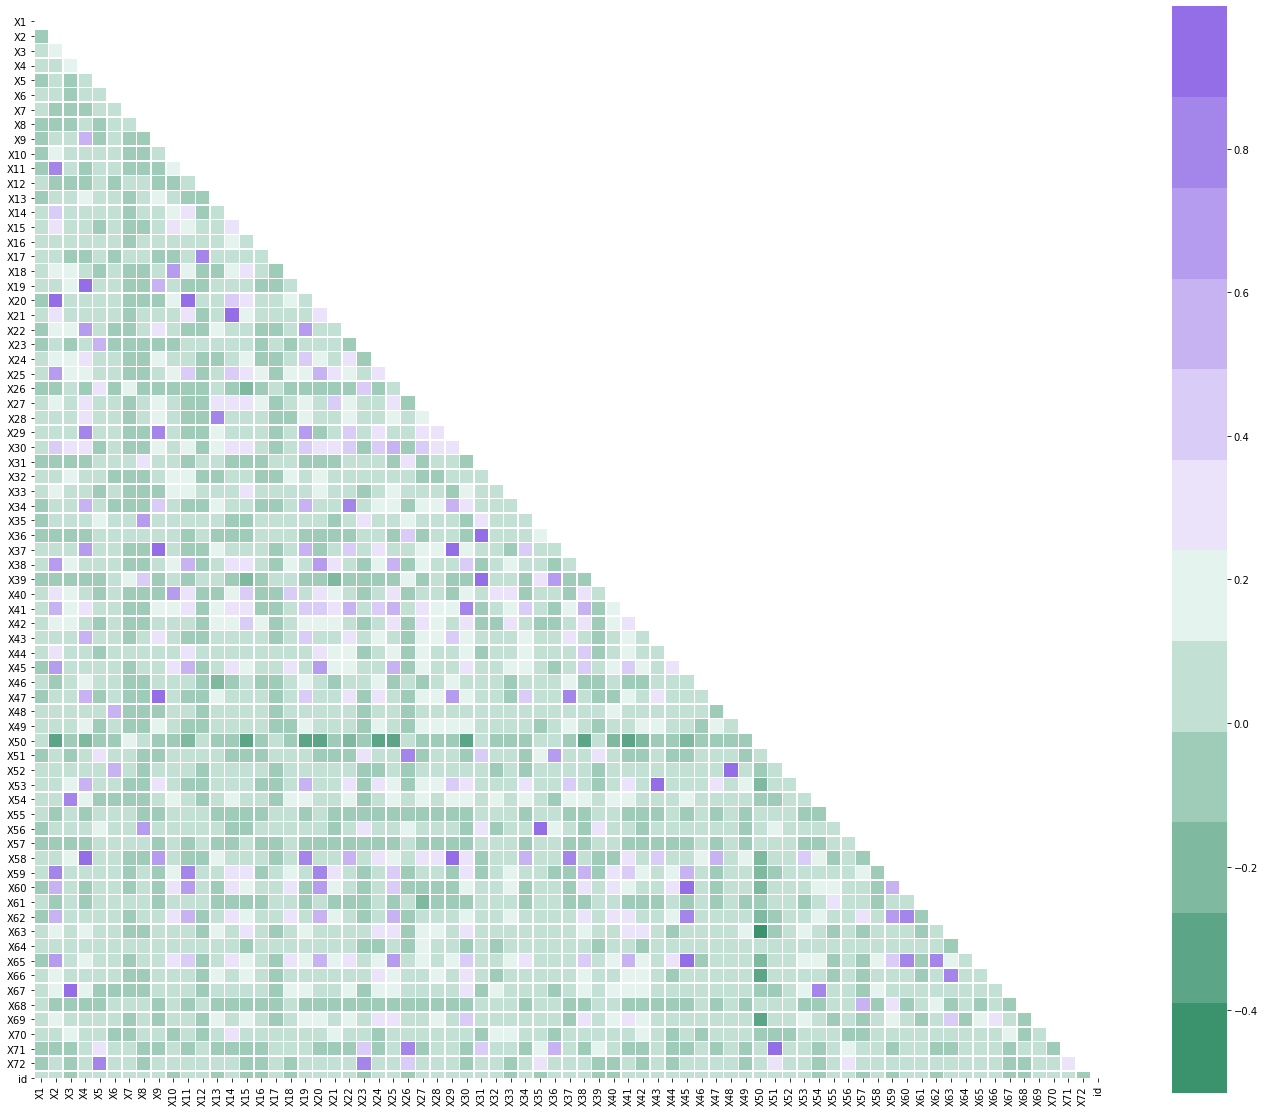

In [28]:
# from matplotlib.font_manager import FontProperties
# myfont=FontProperties(fname=r'./SimSun.ttf')
# sns.set(font=myfont.get_family())
# corr_map = data.corr()

# 英文macOS下中文字体包缺失，seaborn也不能改外部字体包，索性用原数据
corr_map = pd.read_csv(test_file).corr()

f, ax = plt.subplots(figsize=(24, 20))
mask = np.triu(np.ones_like(corr_map, dtype=np.bool))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=12)
sns.heatmap(corr_map, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax)

## 处理缺失数据
每种处理方式新建一个cell，适当备注

### 默认值填充

1. 将缺失值填充为-1
2. 用`replace`方法将所有-1替换为`np.NaN`

In [10]:
data.fillna(-1, inplace=True)
data.replace(to_replace=-1, value=np.NaN, inplace=True)
data

,手机号归属地,籍贯,与黑名单用户联系次数,近六个月通话次数,近六个月搜索次数,近六个月借款机构统计,安装应用平均值,履约次数统计,借款次数统计,用户行为分值,...,过去12个月平均通话时长,过去12个月平均主叫比例,充值次数,上次充值金额,总充值金额,平均充值金额,上个月短信条数,短信总条数,月均短信条数,id
0,3.0,853.0,208.0,15.0,0.000000e+00,1000.0,0.0,NaN,2.0,0.0,...,4355.0,168.0,238.0,34.0,78.0,4083.0,6.0,0.0,0.000000e+00,50000
1,2.0,1637.0,84.0,22.0,1.000000e+10,10000.0,0.0,3072000.0,4.0,14330.0,...,1974.0,476.0,766.0,14.0,60.0,1252.0,6.0,34571438.0,8.333504e+09,50001
2,8.0,3120.0,1218.0,30.0,0.000000e+00,30000.0,0.0,NaN,0.0,25350.0,...,-9054.0,293.0,135.0,203.0,64.0,231.0,6.0,0.0,0.000000e+00,50002
3,6.0,1938.0,48.0,14.0,NaN,1000.0,0.0,NaN,0.0,32126.0,...,2038.0,388.0,155.0,9.0,100.0,317.0,5.0,NaN,NaN,50003
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,442.0,31.0,NaN,1.048576e+06,5000.0,NaN,18000.0,NaN,21930.0,...,1192.0,15.0,NaN,4.0,79.0,NaN,5.0,1191454.0,8.424600e+05,59995
9996,10.0,2373.0,390.0,6.0,NaN,NaN,0.0,NaN,1.0,16592.0,...,408.0,437.0,315.0,65.0,50.0,537.0,5.0,0.0,NaN,59996
9997,NaN,769.0,16.0,16.0,0.000000e+00,4990.0,0.0,NaN,5.0,NaN,...,-273.0,96.0,373.0,3.0,96.0,266.0,6.0,0.0,0.000000e+00,59997
9998,1.0,1974.0,5544.0,12.0,0.000000e+00,10.0,0.0,NaN,2.0,18351.0,...,0.0,309.0,367.0,924.0,59.0,30.0,6.0,0.0,0.000000e+00,59998


可以看到原本缺失的地方已经填充成NaN了

### 平均值填充

对于某些合适的数值属性(例如人的身高等等)，可以用该属性的平均值(**注意，是训练集的平均值**)来进行填充

先检查训练集中X2的均值

In [11]:
raw_data_train.X2.mean()

1046.3130215682322

然后用均值填充之后观察结果

In [12]:
raw_data = pd.read_csv(test_file)
raw_data.X2.fillna(raw_data_train.X2.mean(), inplace=True)
raw_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,id
0,3.0,853.000000,208.0,15.0,0.000000e+00,1000.0,0.0,NaN,2.0,0.0,...,4355.0,168.0,238.0,34.0,78.0,4083.0,6.0,0.0,0.000000e+00,50000
1,2.0,1637.000000,84.0,22.0,1.000000e+10,10000.0,0.0,3072000.0,4.0,14330.0,...,1974.0,476.0,766.0,14.0,60.0,1252.0,6.0,34571438.0,8.333504e+09,50001
2,8.0,3120.000000,1218.0,30.0,0.000000e+00,30000.0,0.0,NaN,0.0,25350.0,...,-9054.0,293.0,135.0,203.0,64.0,231.0,6.0,0.0,0.000000e+00,50002
3,6.0,1938.000000,48.0,14.0,NaN,1000.0,0.0,NaN,0.0,32126.0,...,2038.0,388.0,155.0,9.0,100.0,317.0,5.0,NaN,NaN,50003
4,NaN,1046.313022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,442.000000,31.0,NaN,1.048576e+06,5000.0,NaN,18000.0,NaN,21930.0,...,1192.0,15.0,NaN,4.0,79.0,NaN,5.0,1191454.0,8.424600e+05,59995
9996,10.0,2373.000000,390.0,6.0,NaN,NaN,0.0,NaN,1.0,16592.0,...,408.0,437.0,315.0,65.0,50.0,537.0,5.0,0.0,NaN,59996
9997,NaN,769.000000,16.0,16.0,0.000000e+00,4990.0,0.0,NaN,5.0,NaN,...,-273.0,96.0,373.0,3.0,96.0,266.0,6.0,0.0,0.000000e+00,59997
9998,1.0,1974.000000,5544.0,12.0,0.000000e+00,10.0,0.0,NaN,2.0,18351.0,...,0.0,309.0,367.0,924.0,59.0,30.0,6.0,0.0,0.000000e+00,59998


可以看到本来第5行的X2是缺失数据，此时被填充为训练集中X2的均值了

### 删除不完整的行

#### 删除任何包含空值的行

可以看到只剩下11行了

In [13]:
data = pd.read_csv(test_file)
data.dropna(inplace=True)
data.shape

(11, 73)

#### 删除所有值都为空的行

运行完可以看到有由于不存在所有值都为空的行所以没有行被删除

In [14]:
data = pd.read_csv(test_file)
data.dropna(how='all', inplace=True)
data.shape

(10000, 73)

#### 通过阈值控制

删除非空值少于5的行，有37行被删除

In [15]:
data = pd.read_csv(test_file)
data.dropna(thresh=5, inplace=True)
data.shape

(9963, 73)

#### 以某属性为条件

例如，删除X1为空的行，则有1199行被删除，说明有1199个元组的X1为空

In [16]:
data = pd.read_csv(test_file)
data.dropna(subset=['X1'], inplace=True)
data.shape

(8801, 73)

## 数据变换与离散化
适当备注：变换方式，变换参数...

### 1. 缩放(Scaling)

找到所有数值属性

In [17]:
data = pd.read_csv(test_file)
numeric_feats = data.dtypes[data.dtypes != "object"].index
numeric_feats

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71',
       'X72', 'id'],
      dtype='object')

使用最大最小值规范化

In [18]:
data[numeric_feats] = data[numeric_feats].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,id
0,0.272727,0.068768,0.002254,0.294118,0.000000,0.064062,0.0,NaN,0.105263,0.000000,...,0.062864,0.103534,0.181957,0.002211,0.066440,0.222701,0.333333,0.000000,0.000000,0.0000
1,0.181818,0.131974,0.000910,0.431373,1.000000,0.078125,0.0,0.000307,0.210526,0.105114,...,0.062186,0.294482,0.585627,0.000910,0.051107,0.068288,0.333333,0.291511,0.833350,0.0001
2,0.727273,0.251532,0.013199,0.588235,0.000000,0.109375,0.0,NaN,0.000000,0.185949,...,0.059049,0.181029,0.103211,0.013199,0.054514,0.012600,0.333333,0.000000,0.000000,0.0002
3,0.545455,0.156240,0.000520,0.274510,NaN,0.064062,0.0,NaN,0.000000,0.235652,...,0.062205,0.239926,0.118502,0.000585,0.085179,0.017290,0.277778,NaN,NaN,0.0003
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.035634,0.000336,NaN,0.000105,0.070312,NaN,0.000002,NaN,0.160862,...,0.061964,0.008679,NaN,0.000260,0.067291,NaN,0.277778,0.010046,0.000084,0.9996
9996,0.909091,0.191309,0.004226,0.117647,NaN,NaN,0.0,NaN,0.052632,0.121706,...,0.061741,0.270304,0.240826,0.004226,0.042589,0.029290,0.277778,0.000000,NaN,0.9997
9997,NaN,0.061996,0.000173,0.313725,0.000000,0.070297,0.0,NaN,0.263158,NaN,...,0.061547,0.058896,0.285168,0.000195,0.081772,0.014509,0.333333,0.000000,0.000000,0.9998
9998,0.090909,0.159142,0.060076,0.235294,0.000000,0.062516,0.0,NaN,0.105263,0.134609,...,0.061625,0.190949,0.280581,0.060078,0.050256,0.001636,0.333333,0.000000,0.000000,0.9999


### 2. 规范化(Normalization)

使用零均值规范化

In [19]:
data = pd.read_csv(test_file)
data[numeric_feats] = data[numeric_feats].apply(lambda x: (x - x.mean()) / (x.std()))
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,id
0,-0.749083,-0.250784,-0.412299,0.560741,-0.043607,-0.384609,-0.0861,NaN,-0.003882,-1.079879,...,0.041832,0.331469,-0.795953,-0.417325,-0.039414,2.528088,0.346792,-0.066624,-0.034111,-1.731791
1,-1.045756,0.764085,-0.455101,1.439230,24.205726,0.305458,-0.0861,-0.080488,0.795611,0.207492,...,-0.024205,2.676236,1.099457,-0.458877,-0.478656,0.364926,0.346792,13.802145,37.469856,-1.731445
2,0.734285,2.683793,-0.063674,2.443218,-0.043607,1.838941,-0.0861,NaN,-0.803375,1.197501,...,-0.330070,1.283079,-1.165701,-0.066216,-0.381047,-0.415218,0.346792,-0.066624,-0.034111,-1.731098
3,0.140938,1.153723,-0.467527,0.435242,NaN,-0.384609,-0.0861,NaN,-0.803375,1.806240,...,-0.022430,2.006303,-1.093905,-0.469265,0.497437,-0.349506,-0.867654,NaN,NaN,-1.730752
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.730405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.639103,-0.782813,-0.473395,NaN,-0.041065,-0.077913,NaN,-0.085808,NaN,0.890257,...,-0.045894,-0.833301,NaN,-0.479652,-0.015012,NaN,-0.867654,0.411343,-0.030320,1.730405
9996,1.327632,1.716820,-0.349478,-0.568746,NaN,NaN,-0.0861,NaN,-0.403628,0.410704,...,-0.067639,2.379334,-0.519539,-0.352921,-0.722679,-0.181404,-0.867654,-0.066624,NaN,1.730752
9997,NaN,-0.359520,-0.478572,0.686239,-0.043607,-0.078680,-0.0861,NaN,1.195357,NaN,...,-0.086527,-0.216658,-0.311331,-0.481730,0.399828,-0.388475,0.346792,-0.066624,-0.034111,1.731098
9998,-1.342430,1.200324,1.429545,0.184245,-0.043607,-0.460517,-0.0861,NaN,-0.003882,0.568729,...,-0.078955,1.404885,-0.332870,1.431713,-0.503058,-0.568802,0.346792,-0.066624,-0.034111,1.731445


### 3. 离散化(Discretization)

说明分箱方式、分享数量等

#### 等深分箱

按记录行数分箱，每箱有相同的记录数，该记录数称为箱子的深度

In [20]:
data = pd.read_csv(test_file)
data.X65_bin = pd.qcut(data.X65, q=10, duplicates='drop')
data.X65_bin

0        (146.0, 195.0]
1       (287.0, 1614.0]
2       (287.0, 1614.0]
3       (287.0, 1614.0]
4                   NaN
             ...       
9995       (11.0, 26.0]
9996    (287.0, 1614.0]
9997      (85.0, 111.0]
9998    (287.0, 1614.0]
9999       (26.0, 44.0]
Name: X65, Length: 10000, dtype: category
Categories (10, interval[float64]): [(0.999, 11.0] < (11.0, 26.0] < (26.0, 44.0] < (44.0, 63.0] ... (111.0, 146.0] < (146.0, 195.0] < (195.0, 287.0] < (287.0, 1614.0]]

#### 等宽分箱

让数据集在整个属性值区间上平均分布，每个箱的区间范围相同，该范围称为箱子的宽度。

In [21]:
data.X66_bin = pd.cut(data.X66, bins=[100,200,300,400,500,600])
data.X66_bin

0       (200.0, 300.0]
1                  NaN
2       (100.0, 200.0]
3       (100.0, 200.0]
4                  NaN
             ...      
9995               NaN
9996    (300.0, 400.0]
9997    (300.0, 400.0]
9998    (300.0, 400.0]
9999    (300.0, 400.0]
Name: X66, Length: 10000, dtype: category
Categories (5, interval[int64]): [(100, 200] < (200, 300] < (300, 400] < (400, 500] < (500, 600]]

## 特征构造(交叉)

说明源特征、交叉方式等

先看原本的`X65`与`X66`

In [22]:
data['X65']

0       168.0
1       476.0
2       293.0
3       388.0
4         NaN
        ...  
9995     15.0
9996    437.0
9997     96.0
9998    309.0
9999     33.0
Name: X65, Length: 10000, dtype: float64

In [23]:
data['X66']

0       238.0
1       766.0
2       135.0
3       155.0
4         NaN
        ...  
9995      NaN
9996    315.0
9997    373.0
9998    367.0
9999    373.0
Name: X66, Length: 10000, dtype: float64

实现特征交叉的方法

In [24]:
def add_cross_feature(data, feature_1, feature_2):
    comb_index = data[[feature_1, feature_2]].drop_duplicates()
    comb_index[feature_1 + '_' + feature_2] = np.arange(comb_index.shape[0])
    data = pd.merge(data, comb_index, 'left', on=[feature_1, feature_2])
    return data

先对数据离散化，然后进行特征交叉

In [25]:
data = pd.read_csv(test_file)
data.X65 = pd.qcut(data.X65, q=10, duplicates='drop')
data.X66 = pd.cut(data.X66, bins=[100,200,300,400,500,600])
add_cross_feature(data, 'X65', 'X66')['X65_X66']

0        0
1        1
2        2
3        2
4        3
        ..
9995    33
9996    15
9997    40
9998    15
9999    59
Name: X65_X66, Length: 10000, dtype: int64

## 数据集切分

在指定数据集和测试集上进行划分

In [26]:
num_train = int(data.shape[0] * 0.8)
train_data = data[:num_train]
test_data = data[num_train:]
train_data.shape, test_data.shape

((8000, 73), (2000, 73))

保存至本地文件

In [ ]:
保存处理后的数据集和测试集

In [27]:
train_data.to_csv("./data/train.csv")
test_data.to_csv("./data/test.csv")